## Fundamental and Technical analysis using simfin and ta
In this small Notebook I will create a guideline on how to get all the fundamental data of a stock or a group of stocks using the library simfin. Simfin is a opensource library for financial data, where you can use the free API Key to download financial statements such as incomestatement, cashflowstatement or balancesheet from a lot of companys. After preparing the data I will perform some machine learning a company and try to predict future values of the data.

In [1]:
#Importing the needed libraries to analyze data
import pandas as pd
import simfin as sf
from simfin.names import *
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#The simfin API requires you to set a location on your computer to save all the data from simfin.
#If you dont have a subscription for simfin you can use the free api key and get access to free data from simfin
sf.set_data_dir("simfin data")
sf.set_api_key(api_key="free")

In [3]:
#Here we use the bulk download from simfin to gather all the fundamental data from simfin which we can use for our analysis
income = sf.load_income(variant="quarterly", market = "us")
cashflow = sf.load_cashflow(variant="quarterly", market = "us")
balancesheet = sf.load_balance(variant="quarterly", market = "us")

Dataset "us-income-quarterly" on disk (4 days old).
- Loading from disk ... Done!
Dataset "us-cashflow-quarterly" on disk (4 days old).
- Loading from disk ... Done!
Dataset "us-balance-quarterly" on disk (4 days old).
- Loading from disk ... Done!


### Data cleaning
before we want to get into the analyzation we first need to look for missing data and then decide how to handle that.
First we can print out the percentage of NaN values for each row in our dataset. My suggestion would be that we would drop rows where the missing data is above 10%. After that we can drop the leftover NaN values and still have quite a decent amount of data to work with

In [4]:
#Print out the percentage of missing data in each row
income.isnull().sum()*100/len(income)

SimFinId                                     0.000000
Currency                                     0.000000
Fiscal Year                                  0.000000
Fiscal Period                                0.000000
Publish Date                                 0.000000
Restated Date                                0.000000
Shares (Basic)                               0.994900
Shares (Diluted)                             0.994900
Revenue                                      1.548843
Cost of Revenue                              9.550412
Gross Profit                                 1.478227
Operating Expenses                           0.329541
Selling, General & Administrative            5.184778
Research & Development                      61.131424
Depreciation & Amortization                 55.781875
Operating Income (Loss)                      0.025108
Non-Operating Income (Loss)                  0.954100
Interest Expense, Net                       12.109847
Pretax Income (Loss), Adj.  

In [5]:
cashflow.isnull().sum()*100/len(cashflow)

SimFinId                                      0.000000
Currency                                      0.000000
Fiscal Year                                   0.000000
Fiscal Period                                 0.000000
Publish Date                                  0.000000
Restated Date                                 0.000000
Shares (Basic)                                0.994900
Shares (Diluted)                              0.994900
Net Income/Starting Line                      1.509612
Depreciation & Amortization                   3.435073
Non-Cash Items                                1.680659
Change in Working Capital                     2.011769
Change in Accounts Receivable                91.591997
Change in Inventories                        93.864260
Change in Accounts Payable                   93.263240
Change in Other                              90.225186
Net Cash from Operating Activities            0.006277
Change in Fixed Assets & Intangibles          2.501373
Net Change

In [6]:
balancesheet.isnull().sum()*100/len(balancesheet)

SimFinId                                            0.000000
Currency                                            0.000000
Fiscal Year                                         0.000000
Fiscal Period                                       0.000000
Publish Date                                        0.000000
Restated Date                                       0.000000
Shares (Basic)                                      0.994900
Shares (Diluted)                                    0.994900
Cash, Cash Equivalents & Short Term Investments     0.323264
Accounts & Notes Receivable                         8.531973
Inventories                                        31.182424
Total Current Assets                                0.031385
Property, Plant & Equipment, Net                    1.914476
Long Term Investments & Receivables                71.689290
Other Long Term Assets                              1.198902
Total Noncurrent Assets                             0.426834
Total Assets            

In [7]:
#cleaning the data from rows with to many Nan values
income = income.drop(income.columns[(income.isnull().sum()*100/len(income) >10)], axis = 1)
cashflow = cashflow.drop(cashflow.columns[(cashflow.isnull().sum()*100/len(cashflow) >10)], axis = 1)
balancesheet = balancesheet.drop(balancesheet.columns[(balancesheet.isnull().sum()*100/len(balancesheet) >10)], axis = 1)

In [8]:
#For the next step we can remove unecessary rows from our dataframe like the Id or the publish Date since those are not relevant
rows_to_drop = ["SimFinId","Restated Date", "Shares (Basic)", "Currency", "Fiscal Period", "Fiscal Year", "Publish Date", "Shares (Diluted)"]

income = income.drop(rows_to_drop, axis = 1)
cashflow = cashflow.drop(rows_to_drop, axis = 1)
balancesheet = balancesheet.drop(rows_to_drop, axis = 1)

In [9]:
df = income.merge(cashflow, on = [TICKER, REPORT_DATE], how = "inner")
df = df.merge(balancesheet, on = [TICKER, REPORT_DATE], how = "inner")

<AxesSubplot:>

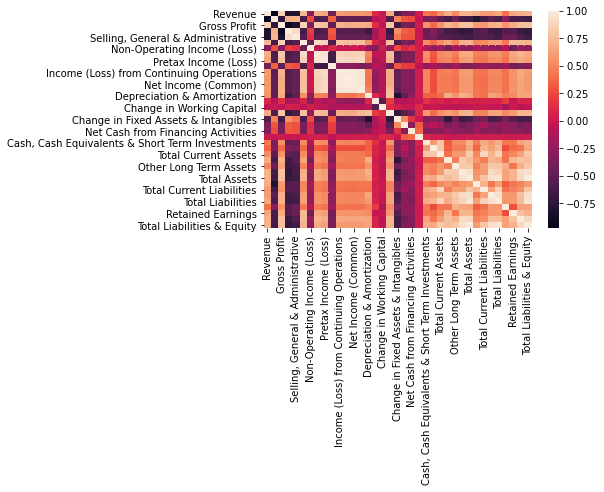

In [10]:
sns.heatmap(df.corr())

### Machine Learning Part
After we analyzed the data and cleaned it we can use the data to perform some machine learning on it. For example I use only one company from the Data set because all the financial statements can look very different from company to company. Therefor I only use one company first and for future projects we can use a group of companys from the same sector.

In [11]:
aapl = df.loc["AAPL"]

In [12]:
aapl.columns

Index(['Revenue', 'Cost of Revenue', 'Gross Profit', 'Operating Expenses',
       'Selling, General & Administrative', 'Operating Income (Loss)',
       'Non-Operating Income (Loss)', 'Pretax Income (Loss), Adj.',
       'Pretax Income (Loss)', 'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations', 'Net Income',
       'Net Income (Common)', 'Net Income/Starting Line',
       'Depreciation & Amortization', 'Non-Cash Items',
       'Change in Working Capital', 'Net Cash from Operating Activities',
       'Change in Fixed Assets & Intangibles',
       'Net Cash from Investing Activities',
       'Net Cash from Financing Activities', 'Net Change in Cash',
       'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Total Current Assets',
       'Property, Plant & Equipment, Net', 'Other Long Term Assets',
       'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals',
       'Total Current Liabilities', 'Total N

<AxesSubplot:>

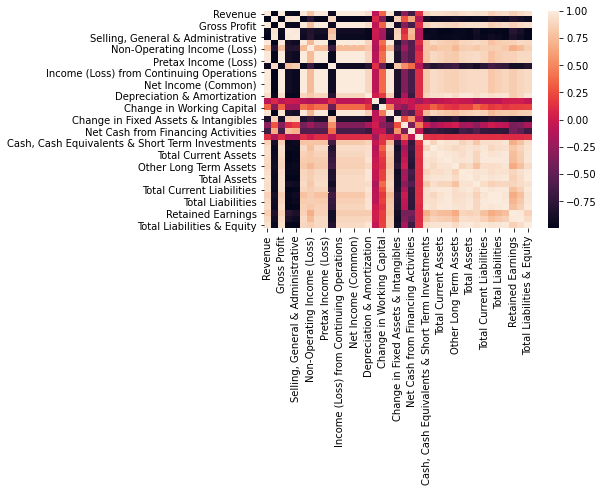

In [14]:
sns.heatmap(aapl.corr())

### Predicting the Future Revenue
Based on all the other columns except the Revenue column we can now try to predict the revenues for the next quartal using the Randomforest Regressor

In [15]:
#Shifting the Revenue row to get a prediction row
aapl["Revenue_pred"] = df.loc["AAPL"]["Revenue"].shift(-1)

In [16]:
#Dropping the last column since our revenue row has been shifted so that there will be no NaN values
aapl.dropna(inplace=True)

In [18]:
aapl.tail(5)

,Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Pretax Income (Loss), Adj.",Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",...,Total Assets,Payables & Accruals,Total Current Liabilities,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Total Equity,Total Liabilities & Equity,Revenue_pred
Report Date,,,,,,,,,,,,,,,,,,,,,
2018-09-30,6.290000e+10,-3.881600e+10,2.408400e+10,-7.966000e+09,-4.216000e+09,1.611800e+10,303000000.0,16421000000,16421000000,-2.296000e+09,...,365725000000,5.588800e+10,1.159290e+11,1.426490e+11,258578000000,4.020100e+10,7.040000e+10,1.071470e+11,365725000000,8.431000e+10
2018-12-31,8.431000e+10,-5.227900e+10,3.203100e+10,-8.685000e+09,-4.783000e+09,2.334600e+10,560000000.0,23906000000,23906000000,-3.941000e+09,...,373719000000,4.429300e+10,1.082830e+11,1.475440e+11,255827000000,4.097000e+10,8.051000e+10,1.178920e+11,373719000000,5.801500e+10
2019-03-31,5.801500e+10,-3.619400e+10,2.182100e+10,-8.406000e+09,-4.458000e+09,1.341500e+10,378000000.0,13793000000,13793000000,-2.232000e+09,...,341998000000,3.044300e+10,9.377200e+10,1.423660e+11,236138000000,4.280100e+10,6.455800e+10,1.058600e+11,341998000000,5.380900e+10
2019-06-30,5.380900e+10,-3.358200e+10,2.022700e+10,-8.683000e+09,-4.426000e+09,1.154400e+10,367000000.0,11911000000,11911000000,-1.867000e+09,...,322239000000,2.911500e+10,8.970400e+10,1.360790e+11,225783000000,4.337100e+10,5.372400e+10,9.645600e+10,322239000000,6.404000e+10
2019-09-30,6.404000e+10,-3.972700e+10,2.431300e+10,-8.688000e+09,-4.578000e+09,1.562500e+10,502000000.0,16127000000,16127000000,-2.441000e+09,...,338516000000,4.623600e+10,1.057180e+11,1.423100e+11,248028000000,4.517400e+10,4.589800e+10,9.048800e+10,338516000000,9.181900e+10


In [19]:
#Importing the Machine Learning libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [20]:
#Setting the X und y Data to perform a train test split
X = aapl.drop(["Revenue", "Revenue_pred"], axis = 1)
y = aapl["Revenue_pred"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.9, test_size = 0.1)

In [21]:
# Create a Random Forest Regressor
model = RandomForestRegressor()

# Fit the data to the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [22]:
print(metrics.r2_score(y_test, y_pred))

0.9236627095426271


In [23]:
#Using the model to predict the Revenue for our last column of our data set which has been cutted off
model.predict(df.loc["AAPL"][-1:].drop("Revenue", axis = 1))

array([6.991277e+10])